In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
from __future__ import division
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [3]:
saha_exp1 = '/usr/people/botiabo/DISAMAR/disamar_2/output_files_exps/sahara_albedo.out'
saha_exp2 = '/usr/people/botiabo/DISAMAR/disamar_2/output_files_exps/sahara_albedo_600-800nm.out'
amaz_exp1 = '/usr/people/botiabo/DISAMAR/disamar_2/output_files_exps/amazon_albedo_600-800nm.out'
amaz_exp2 = '/usr/people/botiabo/DISAMAR/disamar_2/output_files_exps/amazon_albedo_600-800nm_14wvc.out'
amaz_exp3 = '/usr/people/botiabo/DISAMAR/disamar_2/output_files_exps/amazon_albedo_600-800nm_18wvc.out'
arab_exp1 = '/usr/people/botiabo/DISAMAR/disamar_2/output_files_exps/arabian_pen_albedo_600-800nm.out'

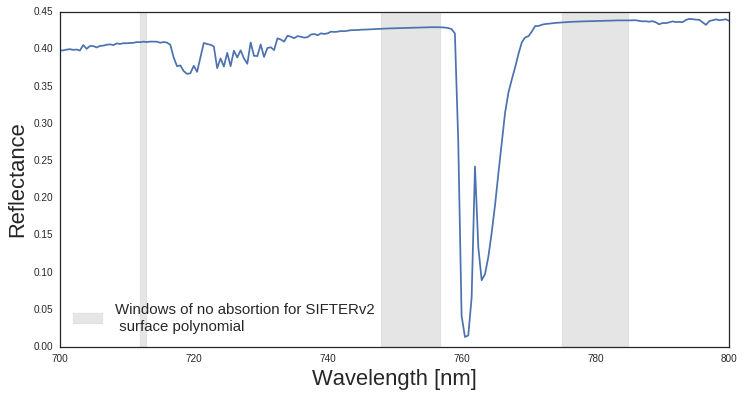

In [9]:
sns.set_style("white")

fig    = plt.figure(1,figsize = (12,6) )
flist  = [saha_exp2]#,amaz_exp1,amaz_exp2,amaz_exp3,arab_exp1]
var    = 'reflectance'
labels = ['','Amazon 1 mol/cm2 wvc','Amazon 14 mol/cm2 wvc','Amazon 18 mol/cm2 wvc','Arabian Peninsula']
cont   = 0

for f in flist:

    var_file = pd.read_table(f, skiprows=20, delim_whitespace=True)
    last_row = var_file.loc[var_file.shape[0]-1]
    var_file = var_file.drop(last_row.name)
    var_file = var_file.drop(var_file.columns[[5,6,7,8]], axis=1) 
    var_file = var_file.astype(float)
    var_file.columns = ['wavelength', 'reflectance', 'sun_normalized_radiance', 'radiance','solar irradiance']
    plt.plot(var_file['wavelength'],var_file[var],label=labels[cont])
    cont+=1

sns.set(font_scale=1)    
plt.ylabel('Reflectance', fontsize=22)
plt.xlabel('Wavelength [nm]', fontsize=22)
plt.axvspan(712,713, alpha=0.2, color='grey')
plt.axvspan(748,757, alpha=0.2, color='grey')
plt.axvspan(775,785, alpha=0.2, color='grey',label='Windows of no absortion for SIFTERv2 \n surface polynomial')
plt.legend(loc='best',fontsize=15) 
plt.xlim(700,800)
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/SyntheticSpectra.png')
plt.show()



# The latter arre the single runs on disamar where the albedo was set according to Amazonian and Sahara surfaces. The water vapour was also prescribed according to the conditions of the amazonian atmosphere

# Shiro et al (2016)
- water vapour in the Amazon varies between 40 - 60 kg/m2
- lower value for the Amazon = 13.3e22 molec/cm2
- higher value for the Amazon = 21.13e22 molec/cm2
- Remind that the Amazon runs in disamar have the same albedo, the config file generator is not randomizing the albedo

In [5]:
avgd = 6.01e23

In [6]:
kg_m2 = 40
molec_m2 = ((kg_m2*1000)/18)*avgd # amazon
molec_cm2 = molec_m2 / (100**2)
print 'water vapour in the amazon', molec_cm2,'molec/cm2'

water vapour in the amazon 1.33555555556e+23 molec/cm2


# Erik varies between 1.33-13.3 molec/cm2 or 4 - 40 kg / m2

In [7]:
kg_m2 = 40
molec_m2 = ((kg_m2*1000)/18)*avgd 
molec_cm2 = molec_m2 / (100**2)
print 'water vapour in the sahara', molec_cm2, 'molec/cm2'

water vapour in the sahara 1.33555555556e+23 molec/cm2


# Level2 Analysis

/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb_Fs_2000/Sahara_Alb_2000.hdf
(1, 1024) 593.0
/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb_Fs_2000/Amazon_Alb_2000.hdf
(1, 1024) 593.0


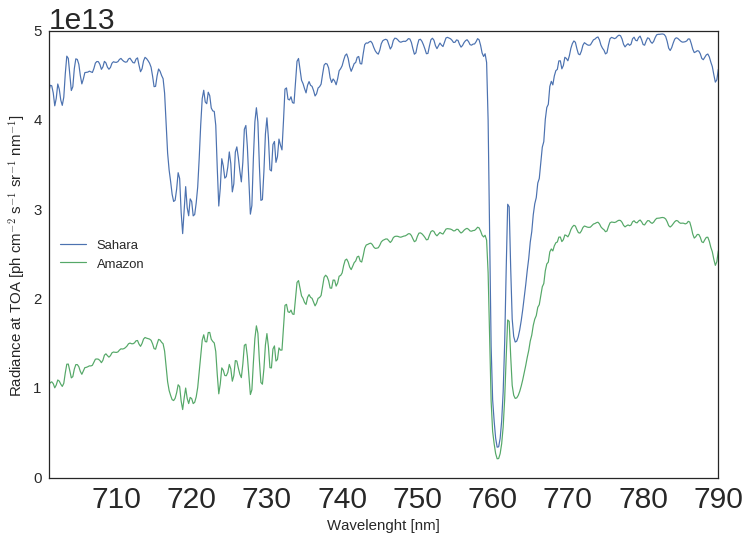

In [8]:
rad1 = '/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb/Amazon_Alb.hdf'
rad2 = '/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb_Fs/Amazon_Alb_Fs.hdf'
rad3 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb/Sahara_Alb.hdf'
rad4 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb_Fs/Sahara_Alb_Fs.hdf'

rad5 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb_Fs_2000/Sahara_Alb_2000.hdf'
rad6 = '/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb_Fs_2000/Amazon_Alb_2000.hdf'

fig  = plt.figure(1,figsize = (12,8))
sns.set_style('white')

zoom = False
rads = [rad5,rad6]#,rad3,rad4]
counter = 0
rand  = randint(0,999)
l     = ['Sahara','Amazon']#['Amazon','Amazon_Fs','Sahara','Sahara_Fs']
color = ['grey','lightgreen','orange']

for f in rads:
    print f
    data    = hdf.File(f,'r') 
    wav     = np.array(data['level1b/wavelength'])
    print wav.shape,wav.min()
    rad     = np.array(data['level1b/rad'])
    rad_std = rad.std(axis=0)
    plt.plot(wav[0],np.mean(rad,axis=0),label=l[counter],linewidth=1.2)
    plt.xlim(701,790)
    
    counter += 1
    
if zoom:
    plt.xlim(738,754)
    plt.ylim(4.3e13,5.2e13)
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Radiance at TOA [ph cm$^{-2}$ s$^{-1}$ sr$^{-1}$ nm$^{-1}$]',fontsize=15)
plt.yticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',fontsize=13)
plt.show()

In [3]:
EOF_file    = '/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/SIFTER2_M02_EOF_2009_01_300it_pcs'
data_EOF    = hdf.File(EOF_file,'r')
EOF_values  = (np.array(data_EOF.get('EOF')))
EOF_var     = (np.array(data_EOF.get('EOF_var')))
EOF_values[0].shape

(120,)

In [6]:
EOF_file       = '/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level2_albedo_retrievals/SIFTER2_M02_EOF_2009_01_Sahara_Fs'
data_EOF       = hdf.File(EOF_file,'r')
EOF_values2000 = (np.array(data_EOF.get('EOF')))
EOF_var2000    = (np.array(data_EOF.get('EOF_var')))
EOF_values[0].shape

(120,)

In [7]:
dfAma    = pd.read_pickle('df_Ama')
dfAma_Fs = pd.read_pickle('df_Ama_Fs')
dfSah    = pd.read_pickle('df_Sah')
dfSah_Fs = pd.read_pickle('df_Sah_Fs')
wav_fit  = np.arange(710,785.2,0.2) 

#2000 iterations runs
dfSah2000 = pd.read_pickle('df_Sah_2000')
dfAma2000 = pd.read_pickle('df_Ama_2000')

rad1 = '/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb/Amazon_Alb_ref.hdf'
rad2 = '/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb_Fs/Amazon_Alb_Fs_ref.hdf'
rad3 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb/Sahara_Alb_ref.hdf'
rad4 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb_Fs/Sahara_Alb_Fs_ref.hdf'

# To rebuild the surface albedo the following formula is used
- n = 4, a are the coefficients and lambda the wavelength node in the fitting window
- i is the wavelength node position
- this is focus only on the surface albedo component


\begin{equation}
\sum_{j=0}^{n}a_{j}\lambda^{j}_{i}
\end{equation}

In [82]:
#  Generating the calculated albedo dataframes for the 2000 iterations case

f           = [dfAma2000,dfSah2000]
amazon2000  = np.zeros((2000,wav_fit.shape[0]),float)
sahara2000  = np.zeros((2000,wav_fit.shape[0]),float)

for k,df in enumerate(f):
    #print l[k]
    dataF = df
    cont  = 0
    for pixel in range(2000):
        pixel_list  = []
        for i in wav_fit:
            
            # Considering the following form x^4*coef5 + x^3*coef4 + x^2*coef3 + x*coef2 + coef1
            pixel_reflectance = ((dataF.iloc[pixel,8]*(i**4)) + (dataF.iloc[pixel,7]*(i**3)) 
                                 + (dataF.iloc[pixel,6]*(i**2)) + (dataF.iloc[pixel,5]*i) + 
                                 (dataF.iloc[pixel,4]))
             
            pixel_list.append(pixel_reflectance)
        
        #print len(pixel_list)
        if k==0: 
            #print l[k]
            amazon2000[cont] = pixel_list
            cont+=1
        if k==1: 
            #print l[k]
            sahara2000[cont] = pixel_list
            cont+=1   
    print 'next retrieval'
print 'done'

next retrieval
next retrieval
done


In [ ]:
# Generating the calculated albedo dataframes for the 300 iterations case

f           = [dfAma,dfAma_Fs,dfSah,dfSah_Fs]
amazon      = np.zeros((300,wav_fit.shape[0]),float)
amazon_Fs   = np.zeros((300,wav_fit.shape[0]),float)
sahara      = np.zeros((300,wav_fit.shape[0]),float)
sahara_Fs   = np.zeros((300,wav_fit.shape[0]),float)

for k,df in enumerate(f):
    #print l[k]
    dataF = df
    cont  = 0
    for pixel in range(300):
        pixel_list  = []
        for i in wav_fit:
            
            # Considering the following form x^4*coef5 + x^3*coef4 + x^2*coef3 + x*coef2 + coef1
            pixel_reflectance = ((dataF.iloc[pixel,8]*(i**4)) + (dataF.iloc[pixel,7]*(i**3)) 
                                 + (dataF.iloc[pixel,6]*(i**2)) + (dataF.iloc[pixel,5]*i) + 
                                 (dataF.iloc[pixel,4]))
             
            pixel_list.append(pixel_reflectance)
        
        #print len(pixel_list)
        if k==0: 
            #print l[k]
            amazon[cont] = pixel_list
            cont+=1
        if k==1: 
            #print l[k]
            amazon_Fs[cont] = pixel_list
            cont+=1
        if k==2: 
            #print l[k]
            sahara[cont] = pixel_list
            cont+=1
        if k==3: 
            #print l[k]
            sahara_Fs[cont] = pixel_list
            cont+=1
            
    print 'next retrieval'
print 'done'

NameError: name 'amazon2000' is not defined

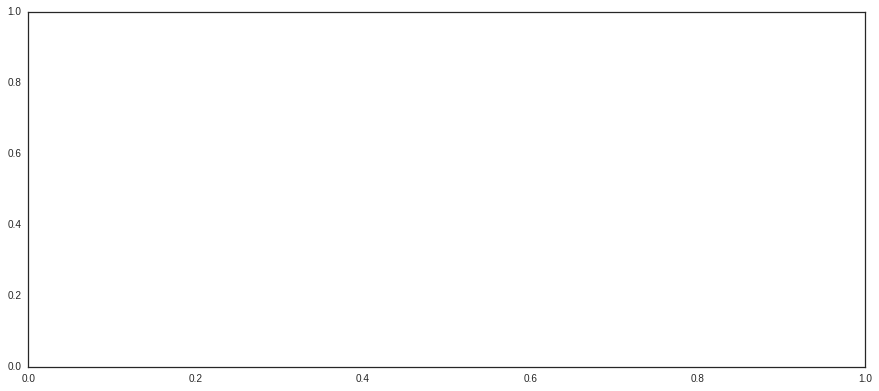

In [80]:
real_alb  = [0.07,0.08,0.12,0.19,0.23,0.25,0.26]
yerr_am   = [i*1.1 for i in real_alb]
real_albS = [0.39,0.41,0.41,0.42,0.43,0.44,0.45]
yerr_sa   = [i*1.1 for i in real_albS]
wave_node = [670,690,710,730,750,770,800]

fig  = plt.figure(1,figsize = (15,14))
sns.set_style('white')

zoom = False
    
plt.subplot(211)
rand = randint(0,2000)
#plt.plot(wav_fit,amazon2000[rand],label='Retrieved Amazon - pixel %i'%(rand))
plt.plot(wav_fit,np.mean(amazon2000,axis=0),label='Retrieved Amazon - pixel %i'%(rand))
#plt.plot(wav_fit,amazon_albedo_Fs[rand],label='Retrieved Amazon with Fs - pixel %i'%(rand))
#plt.plot(wav_fit,np.mean(amazon,axis=0),label='Retrieved Amazon')
#plt.plot(wav_fit,np.mean(amazon_Fs,axis=0),label='Retrieved Amazon with Fs')
plt.scatter(wave_node,real_alb,label='prescribed albedo in DISAMAR',color='red')
if zoom: plt.xlim(730,760)
else: plt.xlim(700,790)
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Surface Albedo',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axvspan(712,713, alpha=0.2, color='grey')
plt.axvspan(748,757, alpha=0.2, color='grey')
plt.axvspan(775,785, alpha=0.2, color='grey',label='Windows of no absorption for SIFTERv2 \n surface polynomial')
plt.legend(loc='lower left',fontsize=13)

plt.subplot(212)
#plt.plot(wav_fit,sahara2000[rand],label='Retrieved Sahara - pixel %i'%(rand))
plt.plot(wav_fit,np.mean(sahara2000,axis=0),label='Retrieved Sahara - pixel %i'%(rand))
#plt.plot(wav_fit,sahara_albedo_Fs[rand],label='Retrieved Sahara with Fs - pixel %i'%(rand))
#plt.plot(wav_fit,np.mean(sahara,axis=0),label='Retrieved Sahara')
#plt.plot(wav_fit,np.mean(sahara_Fs,axis=0),label='Retrieved Sahara with Fs')
plt.scatter(wave_node,real_albS,label='prescribed albedo in DISAMAR',color='red')
if zoom: plt.xlim(730,760)
else: plt.xlim(700,790)
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Surface Albedo',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axvspan(712,713, alpha=0.2, color='grey')
plt.axvspan(748,757, alpha=0.2, color='grey')
plt.axvspan(775,785, alpha=0.2, color='grey',label='Windows of no absorption for SIFTERv2 \n surface polynomial')
plt.legend(loc='upper right',fontsize=13)
#'''pixel 266

In [317]:
from scipy import stats
#print stats.zscore(amazon,axis=0).shape
#print np.mean(amazon,axis=0).shape

# Note
- From the latter we see that the polynomial is underestimating the reflectance, so in places where there is a lot of reflectance but no Fs, like the Sahara, the alghorithm needs to compensate with negative Fs
- Include std

# To rebuild the surface reflectance polynomial the following formula is used. This is focused specifically on the fitting window
- n = 4, a are the coefficients and lambda the wavelength node in the fitting window
- i is the wavelength node position
- Here we add the PC part which describes the atmospheric trasnmittance. We are now looking at reflectance at TOA

\begin{equation}
\sum_{j=0}^{n}a_{j}\lambda^{j}_{i}*e^{-\sum_{k=1}^{m}b_kf_k(\lambda_i)}
\end{equation}

In [69]:
index = np.where((wav_fit>=734) & (wav_fit<=758))
dfAma.head()

,Fs,height,Autocorr,chi2,Coef1,Coef2,Coef3,Coef4,Coef5,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.000327,234.367609,0.159040,0.000868,1730.074089,-9.616838,0.019986,-0.000018,6.343922e-09,0.661149,-0.097484,-0.017618,0.000263,0.000490,-0.000921,0.000117,0.000121,-0.000129,0.001255
1,-0.000050,234.367609,0.101812,0.000911,-15668.650995,85.292162,-0.173945,0.000158,-5.345127e-08,0.607270,-0.087491,-0.012213,0.000782,-0.000621,-0.000441,0.000297,0.000273,-0.000187,0.000304
2,0.000397,234.367609,0.345166,0.002680,-13838.757799,75.478878,-0.154175,0.000140,-4.747705e-08,0.814672,-0.128575,-0.032164,-0.000384,0.000230,-0.000965,0.000112,-0.000478,0.000039,0.000245
3,0.000265,234.367609,0.018141,0.000938,-5442.734701,29.797291,-0.061082,0.000056,-1.893510e-08,0.667132,-0.103220,-0.017782,-0.000337,0.000137,-0.000266,0.000617,-0.000410,-0.000380,0.001031
4,0.028856,234.367609,0.693971,0.252535,-65033.305603,347.516700,-0.696374,0.000620,-2.071291e-07,-0.541466,0.001003,0.031506,-0.002223,-0.004724,0.000387,-0.003446,0.007290,-0.006198,-0.011181


In [27]:
# this creates array with the atmospheric transmittance per pixel for the 2000 iterations case

f               = [dfAma2000,dfSah2000]
index           = np.where((wav_fit>=734) & (wav_fit<=758))
amazon_ref2000  = np.zeros((2000,wav_fit[index].shape[0]),float)
sahara_ref2000  = np.zeros((2000,wav_fit[index].shape[0]),float)


for g,df in enumerate(f):
    #print l[k]
    dataF = df
    cont  = 0
    for pixel in range(2000):
        sum_nodes  = []
        for k,i in enumerate(wav_fit[index]):
            # Considering the following form x^4*coef5 + x^3*coef4 + ...
            node = i
            listt = []
            for j in range(10):
                a = EOF_values2000[j][k]*dataF.iloc[pixel,9+j]
                listt.append(a)
            sum_nodes.append(sum(listt))

        if g==0: 
            #print l[k]
            amazon_ref2000[cont] = sum_nodes
            cont+=1
        if g==1: 
            #print l[k]
            sahara_ref2000[cont] = sum_nodes
            cont+=1
   
            
    print 'next retrieval'
    #'''

next retrieval
next retrieval


In [210]:
# this creates array with the atmospheric transmittance per pixel

f               = [dfAma,dfAma_Fs,dfSah,dfSah_Fs]
index           = np.where((wav_fit>=734) & (wav_fit<=758))
amazon_ref      = np.zeros((300,wav_fit[index].shape[0]),float)
amazon_ref_Fs   = np.zeros((300,wav_fit[index].shape[0]),float)
sahara_ref      = np.zeros((300,wav_fit[index].shape[0]),float)
sahara_ref_Fs   = np.zeros((300,wav_fit[index].shape[0]),float)

for g,df in enumerate(f):
    #print l[k]
    dataF = df
    cont  = 0
    for pixel in range(300):
        sum_nodes  = []
        for k,i in enumerate(wav_fit[index]):
            # Considering the following form x^4*coef5 + x^3*coef4 + ...
            node = i
            listt = []
            for j in range(10):
                a = EOF_values[j][k]*dataF.iloc[pixel,9+j]
                listt.append(a)
            sum_nodes.append(sum(listt))

        if g==0: 
            #print l[k]
            amazon_ref[cont] = sum_nodes
            cont+=1
        if g==1: 
            #print l[k]
            amazon_ref_Fs[cont] = sum_nodes
            cont+=1
        if g==2: 
            #print l[k]
            sahara_ref[cont] = sum_nodes
            cont+=1
        if g==3: 
            #print l[k]
            sahara_ref_Fs[cont] = sum_nodes
            cont+=1
            
    print 'next retrieval'
    #'''

next retrieval
next retrieval
next retrieval
next retrieval


In [9]:
def ref_spectra(run,pixel):
    
    rad1 = '/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb/Amazon_Alb_ref.hdf'
    rad2 = '/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb_Fs/Amazon_Alb_Fs_ref.hdf'
    rad3 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb/Sahara_Alb_ref.hdf'
    rad4 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb_Fs/Sahara_Alb_Fs_ref.hdf'
    
    rad5 = '/usr/people/botiabo/DISAMAR/salida/DIS_Amazon_Alb_Fs_2000/Amazon_Alb_2000.hdf'
    rad6 = '/usr/people/botiabo/DISAMAR/salida/DIS_Sahara_Alb_Fs_2000/Sahara_Alb_2000.hdf'

    if run == 'amazon':

        data        = hdf.File(rad1,'r') 
        wav         = np.array(data['level1b/wavelength'])
        ref         = np.array(data['level1b/ref'])
        index2      = np.where((wav[0]>=734) & (wav[0]<=758))
        wavelength  = wav[0][index2]
        reflectance = ref[pixel][index2]
    
    if run == 'amazon_fs':

        data        = hdf.File(rad2,'r') 
        wav         = np.array(data['level1b/wavelength'])
        ref         = np.array(data['level1b/ref'])
        index2      = np.where((wav[0]>=734) & (wav[0]<=758))
        wavelength  = wav[0][index2]
        reflectance = ref[pixel][index2]
    
    if run == 'sahara':

        data        = hdf.File(rad3,'r') 
        wav         = np.array(data['level1b/wavelength'])
        ref         = np.array(data['level1b/ref'])
        index2      = np.where((wav[0]>=734) & (wav[0]<=758))
        wavelength  = wav[0][index2]
        reflectance = ref[pixel][index2]
        
    if run == 'sahara_fs':

        data        = hdf.File(rad4,'r') 
        wav         = np.array(data['level1b/wavelength'])
        ref         = np.array(data['level1b/ref'])
        index2      = np.where((wav[0]>=734) & (wav[0]<=758))
        wavelength  = wav[0][index2]
        reflectance = ref[pixel][index2]
        
    if run == 'amazon2000':

        data        = hdf.File(rad5,'r') 
        wav         = np.array(data['level1b/wavelength'])
        ref         = np.array(data['level1b/ref'])
        index2      = np.where((wav[0]>=734) & (wav[0]<=758))
        wavelength  = wav[0][index2]
        reflectance = ref[pixel][index2]
        
    if run == 'sahara2000':

        data        = hdf.File(rad6,'r') 
        wav         = np.array(data['level1b/wavelength'])
        ref         = np.array(data['level1b/ref'])
        index2      = np.where((wav[0]>=734) & (wav[0]<=758))
        wavelength  = wav[0][index2]
        reflectance = ref[pixel][index2]

    
    return wavelength,reflectance


In [31]:
#np.save('amazon_albedo', amazon)
#np.save('amazon_albedo_Fs', amazon_Fs)
#np.save('amazon_reflec', amazon_ref)
#np.save('amazon_reflec_Fs', amazon_ref_Fs)
#np.save('sahara_albedo', sahara)
#np.save('sahara_albedo_Fs', sahara_Fs)
#np.save('sahara_reflec', sahara_ref)
#np.save('sahara_reflec_Fs', sahara_ref_Fs)

np.save('sahara_ref2000', sahara_ref2000)
np.save('amazon_ref2000', amazon_ref2000)
np.save('amazon2000',amazon2000)
np.save('sahara2000',sahara2000)

In [8]:
amazon_albedo    = np.load('amazon_albedo.npy')
amazon_albedo_Fs = np.load('amazon_albedo_Fs.npy')
amazon_reflec    = np.load('amazon_reflec.npy')
amazon_reflec_Fs = np.load('amazon_reflec_Fs.npy')

sahara_albedo    = np.load('sahara_albedo.npy')
sahara_albedo_Fs = np.load('sahara_albedo_Fs.npy')
sahara_reflec    = np.load('sahara_reflec.npy')
sahara_reflec_Fs = np.load('sahara_reflec_Fs.npy')

amazon_reflec_2000 = np.load('amazon_ref2000.npy')
sahara_reflec_2000 = np.load('sahara_ref2000.npy')
amazon_albedo_2000 = np.load('amazon2000.npy')
sahara_albedo_2000 = np.load('sahara2000.npy')

Amazon Fs = 1.737 [mW m-2 sr-1 nm-1]
Amazon Autocorr = 0.216 
Amazon Chi2 = 0.0035 

Plotted Pixel 826
Pixels (0-400) = 0 Fs
Pixels (400-800) = 0.5 Fs
Pixels (800-1200) = 1.0 Fs
Pixels (1200-1600) = 2.0 Fs
Pixels (1600-2000) = 4.0 Fs [mW m-2 sr-1 nm-1]

Sahara Fs = 0.946 [mW m-2 sr-1 nm-1]
Sahara Autocorr = 0.042 
Sahara Chi2 = 0.0003 


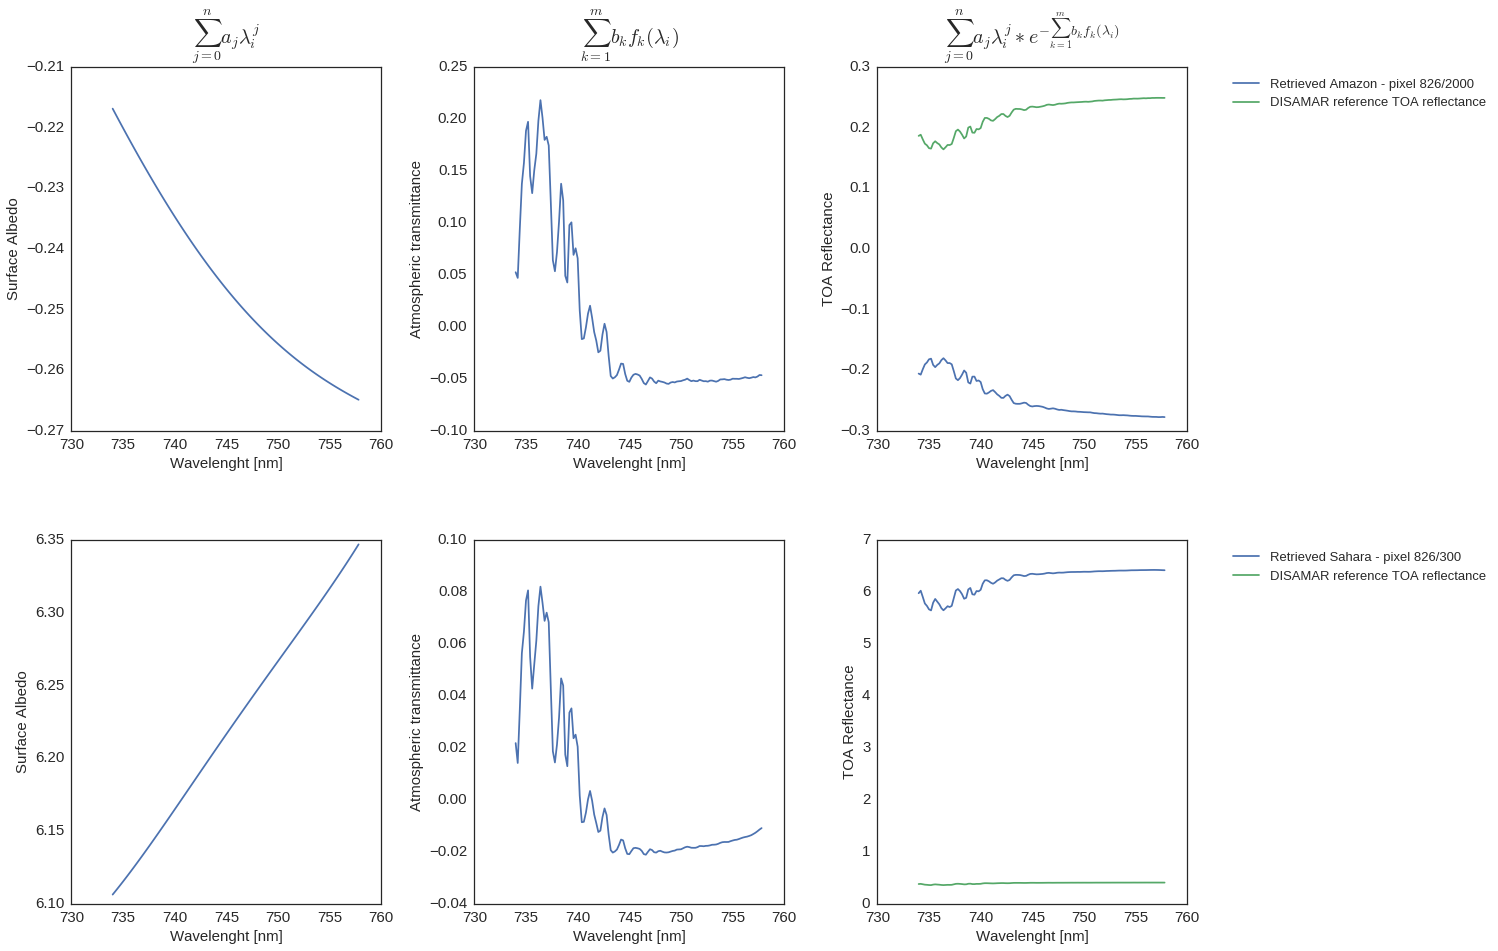

'\n#pixel 1849 - Amazon - chi2 indicates overfitting, autocorr over the limit, underestimated ref and albedo. However the Fs is ok. \n            - Sahara - chi2 indicates overoverfitting, negative autocorr, good fit for albedo and refl and good Fs.\n#pixel 1584 - Amazon - chi2 0.0043 of, autocorr over the thresh, bad fit in alb and refl, good Fs.\n            - Sahara - chi2 0.0008, 0.199 autocorr, wrong alb and refl, bad Fs.\n\n# It seems that even when having incorrect albedo and reflectance Fs can be retrieved correctly and go even to the Level 3 \ndata meeting the autocorr filter: Pixel 1510 for Sahara, pixel 1015 for both, pixel 411\n'

In [79]:
fig             = plt.figure(1,figsize = (20,15))
rand            = randint(0,2000)
#rand           = 288
index2          = np.where((wav_fit>=734) & (wav_fit<=758))

TOA_refl_ama2000 = amazon_albedo_2000[rand][index2]*np.exp(-amazon_reflec_2000[rand])
TOA_refl_sah2000 = sahara_albedo_2000[rand][index2]*np.exp(-sahara_reflec_2000[rand])

sns.set_style('white')

plt.subplot(231)
plt.plot(wav_fit[index2],amazon_albedo_2000[rand][index2],label='Retrieved Amazon - pixel %i/2000'%(rand))
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Surface Albedo',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)
plt.title('$\sum_{j=0}^{n}a_{j}\lambda^{j}_{i}$',fontsize=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])

plt.subplot(232)
plt.plot(wav_fit[index2],amazon_reflec_2000[rand],label='Retrieved Amazon - pixel %i/2000'%(rand))
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Atmospheric transmittance',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)
plt.title('$\sum_{k=1}^{m}b_kf_k(\lambda_i)$',fontsize=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])

plt.subplot(233)
plt.plot(wav_fit[index2],TOA_refl_ama2000,label='Retrieved Amazon - pixel %i/2000'%(rand))
plt.plot(ref_spectra('amazon2000',rand)[0],ref_spectra('amazon2000',rand)[1],label='DISAMAR reference TOA reflectance')
#plt.plot(ref_spectra('amazon_fs')[0],ref_spectra('amazon_fs')[1],label='DISAMAR_Fs')
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('TOA Reflectance',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)
plt.title('$\sum_{j=0}^{n}a_{j}\lambda^{j}_{i}*e^{-\sum_{k=1}^{m}b_kf_k(\lambda_i)}$',fontsize=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.legend(bbox_to_anchor=(2,1),fontsize=13)

plt.subplot(234)
plt.plot(wav_fit[index2],sahara_albedo_2000[rand][index2])
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Surface Albedo',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)

plt.subplot(235)
plt.plot(wav_fit[index2],sahara_reflec_2000[rand])
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Atmospheric transmittance',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)

plt.subplot(236)
plt.plot(wav_fit[index2],TOA_refl_sah2000,label='Retrieved Sahara - pixel %i/300'%(rand))
plt.plot(ref_spectra('sahara2000',rand)[0],ref_spectra('sahara2000',rand)[1],label='DISAMAR reference TOA reflectance')
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('TOA Reflectance',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)
plt.legend(bbox_to_anchor=(2,1),fontsize=13)
plt.subplots_adjust(wspace=0.3,hspace=0.3)


print 'Amazon Fs = %0.3f [mW m-2 sr-1 nm-1]'%(dfAma2000['Fs'].loc[rand]*1000)
print 'Amazon Autocorr = %0.3f '%(dfAma2000['Autocorr'].loc[rand])
print 'Amazon Chi2 = %0.4f '%(dfAma2000['chi2'].loc[rand])

print ''
print 'Plotted Pixel %i'%(rand)
print 'Pixels (0-400) = 0 Fs' 
print 'Pixels (400-800) = 0.5 Fs' 
print 'Pixels (800-1200) = 1.0 Fs'
print 'Pixels (1200-1600) = 2.0 Fs'
print 'Pixels (1600-2000) = 4.0 Fs [mW m-2 sr-1 nm-1]'
print ''


print 'Sahara Fs = %0.3f [mW m-2 sr-1 nm-1]'%(dfSah2000['Fs'].loc[rand]*1000)
print 'Sahara Autocorr = %0.3f '%(dfSah2000['Autocorr'].loc[rand])
print 'Sahara Chi2 = %0.4f '%(dfSah2000['chi2'].loc[rand])


plt.show() 

'''
#pixel 1849 - Amazon - chi2 indicates overfitting, autocorr over the limit, underestimated ref and albedo. However the Fs is ok. 
            - Sahara - chi2 indicates overoverfitting, negative autocorr, good fit for albedo and refl and good Fs.
#pixel 1584 - Amazon - chi2 0.0043 of, autocorr over the thresh, bad fit in alb and refl, good Fs.
            - Sahara - chi2 0.0008, 0.199 autocorr, wrong alb and refl, bad Fs.

# It seems that even when having incorrect albedo and reflectance Fs can be retrieved correctly and go even to the Level 3 
data meeting the autocorr filter: Pixel 1510 for Sahara, pixel 1015 for both, pixel 411
'''#pixel 288

Amazon Blue Fs = 0.170 [mW m-2 sr-1 nm-1]
Amazon Blue Autocorr = 0.025 
Amazon Blue Chi2 = 0.0012 
Amazon Green Retrieved Fs = 0.904 [mW m-2 sr-1 nm-1]
Amazon Green Autocorr = 0.318 
Amazon Green Chi2 = 0.0036 

Pixels (0-60) = 0 Fs, Pixels (60-120) = 0.5 Fs
Pixels (120-180) = 1.0 Fs, Pixels (180-240) = 2.0 Fs
Pixels (240-300) = 4.0 Fs [mW m-2 sr-1 nm-1]

Sahara Blue Fs = 0.394 [mW m-2 sr-1 nm-1]
Sahara Blue Autocorr = 0.012 
Sahara Blue Chi2 = 0.0005 
Sahara Green Retrieved Fs = 0.398 [mW m-2 sr-1 nm-1]
Sahara Green Autocorr = -0.101 
Sahara Green Chi2 = 0.0006 


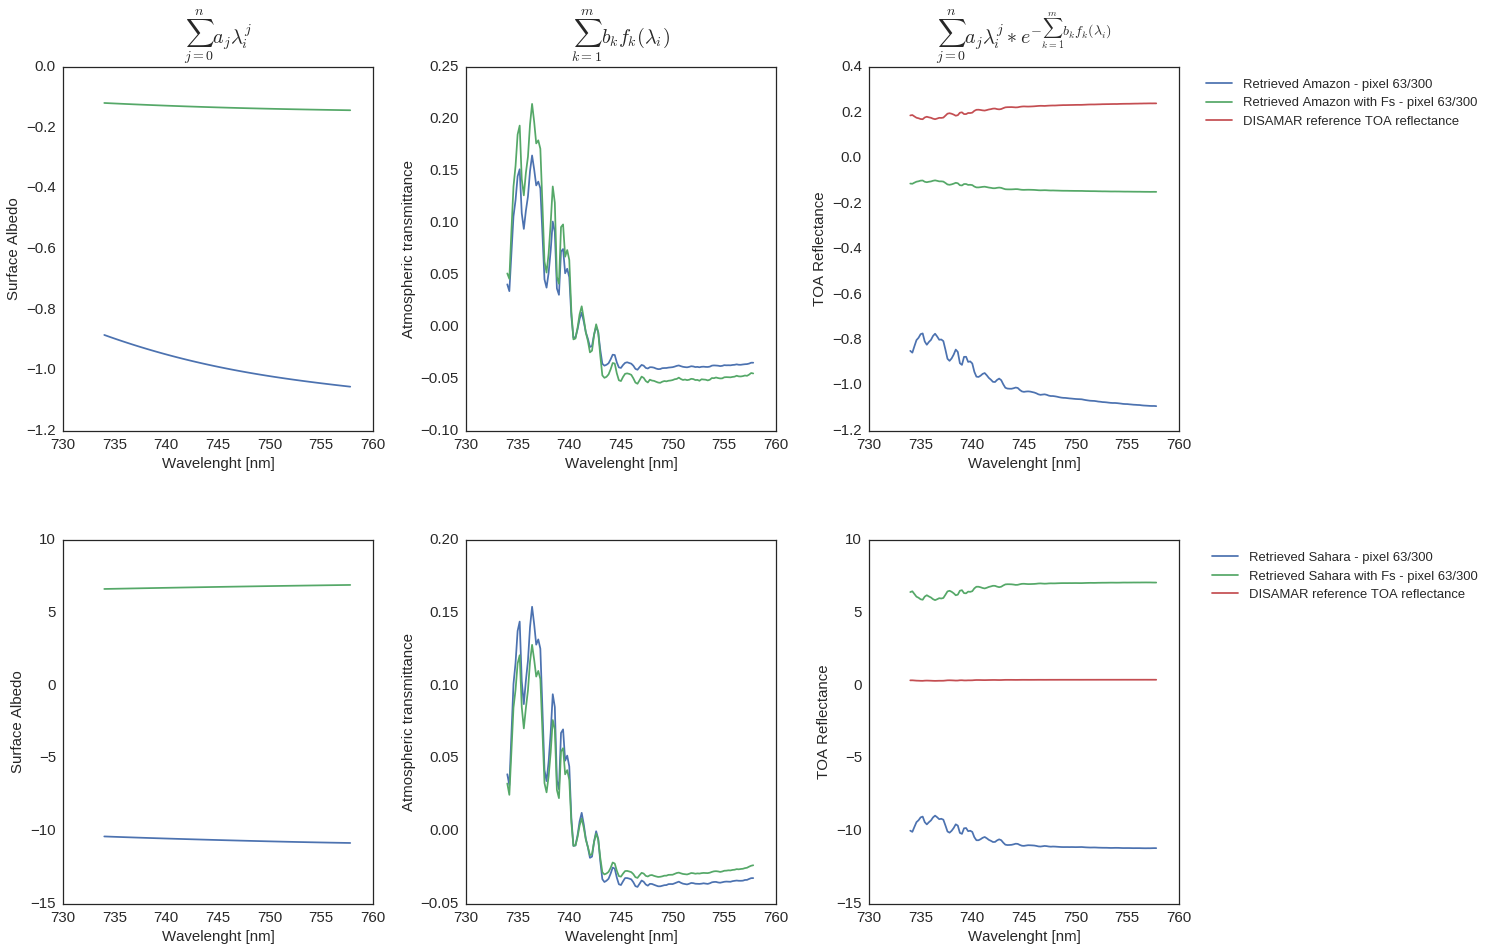

In [73]:
fig             = plt.figure(1,figsize = (20,15))
rand            = randint(0,300)
#rand            = 271
index2          = np.where((wav_fit>=734) & (wav_fit<=758))
TOA_refl_ama    = amazon_albedo[rand][index2]*np.exp(-amazon_reflec[rand])
TOA_refl_ama_Fs = amazon_albedo_Fs[rand][index2]*np.exp(-amazon_reflec_Fs[rand])
TOA_refl_sah    = sahara_albedo[rand][index2]*np.exp(-sahara_reflec[rand])
TOA_refl_sah_Fs = sahara_albedo_Fs[rand][index2]*np.exp(-sahara_reflec_Fs[rand])

sns.set_style('white')

plt.subplot(231)
plt.plot(wav_fit[index2],amazon_albedo[rand][index2],label='Retrieved Amazon - pixel %i/300'%(rand))
plt.plot(wav_fit[index2],amazon_albedo_Fs[rand][index2],label='Retrieved Amazon with Fs - pixel %i/300'%(rand))
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Surface Albedo',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)
plt.title('$\sum_{j=0}^{n}a_{j}\lambda^{j}_{i}$',fontsize=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])
#plt.annotate('FluorescenceBlue = %0.3f [mW m-2 sr-1 nm-1]'%(dfAma['Fs'].loc[rand]*1000),xy=(730,-.6))

plt.subplot(232)
plt.plot(wav_fit[index2],amazon_reflec[rand],label='Retrieved Amazon - pixel %i/300'%(rand))
plt.plot(wav_fit[index2],amazon_reflec_Fs[rand],label='Retrieved Amazon with Fs - pixel %i/300'%(rand))
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Atmospheric transmittance',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)
plt.title('$\sum_{k=1}^{m}b_kf_k(\lambda_i)$',fontsize=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])

plt.subplot(233)
plt.plot(wav_fit[index2],TOA_refl_ama,label='Retrieved Amazon - pixel %i/300'%(rand))
plt.plot(wav_fit[index2],TOA_refl_ama_Fs,label='Retrieved Amazon with Fs - pixel %i/300'%(rand))
plt.plot(ref_spectra('amazon',rand)[0],ref_spectra('amazon',rand)[1],label='DISAMAR reference TOA reflectance')
#plt.plot(ref_spectra('amazon_fs')[0],ref_spectra('amazon_fs')[1],label='DISAMAR_Fs')
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('TOA Reflectance',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)
plt.title('$\sum_{j=0}^{n}a_{j}\lambda^{j}_{i}*e^{-\sum_{k=1}^{m}b_kf_k(\lambda_i)}$',fontsize=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.legend(bbox_to_anchor=(2,1),fontsize=13)

plt.subplot(234)
plt.plot(wav_fit[index2],sahara_albedo[rand][index2])
plt.plot(wav_fit[index2],sahara_albedo_Fs[rand][index2])
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Surface Albedo',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)

plt.subplot(235)
plt.plot(wav_fit[index2],sahara_reflec[rand])
plt.plot(wav_fit[index2],sahara_reflec_Fs[rand])
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('Atmospheric transmittance',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)

plt.subplot(236)
plt.plot(wav_fit[index2],TOA_refl_sah,label='Retrieved Sahara - pixel %i/300'%(rand))
plt.plot(wav_fit[index2],TOA_refl_sah_Fs,label='Retrieved Sahara with Fs - pixel %i/300'%(rand))
plt.plot(ref_spectra('sahara',rand)[0],ref_spectra('sahara',rand)[1],label='DISAMAR reference TOA reflectance')
plt.xlabel('Wavelenght [nm]',fontsize=15)
plt.ylabel('TOA Reflectance',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(730,760)
plt.legend(bbox_to_anchor=(2,1),fontsize=13)
plt.subplots_adjust(wspace=0.3,hspace=0.3)


print 'Amazon Blue Fs = %0.3f [mW m-2 sr-1 nm-1]'%(dfAma['Fs'].loc[rand]*1000)
print 'Amazon Blue Autocorr = %0.3f '%(dfAma['Autocorr'].loc[rand])
print 'Amazon Blue Chi2 = %0.4f '%(dfAma['chi2'].loc[rand])

print 'Amazon Green Retrieved Fs = %0.3f [mW m-2 sr-1 nm-1]'%(dfAma_Fs['Fs'].loc[rand]*1000)
print 'Amazon Green Autocorr = %0.3f '%(dfAma_Fs['Autocorr'].loc[rand])
print 'Amazon Green Chi2 = %0.4f '%(dfAma_Fs['chi2'].loc[rand])

print ''
print 'Pixels (0-60) = 0 Fs, Pixels (60-120) = 0.5 Fs' 
print 'Pixels (120-180) = 1.0 Fs, Pixels (180-240) = 2.0 Fs'
print 'Pixels (240-300) = 4.0 Fs [mW m-2 sr-1 nm-1]'
print ''

print 'Sahara Blue Fs = %0.3f [mW m-2 sr-1 nm-1]'%(dfSah['Fs'].loc[rand]*1000)
print 'Sahara Blue Autocorr = %0.3f '%(dfSah['Autocorr'].loc[rand])
print 'Sahara Blue Chi2 = %0.4f '%(dfSah['chi2'].loc[rand])

print 'Sahara Green Retrieved Fs = %0.3f [mW m-2 sr-1 nm-1]'%(dfSah_Fs['Fs'].loc[rand]*1000)
print 'Sahara Green Autocorr = %0.3f '%(dfSah_Fs['Autocorr'].loc[rand])
print 'Sahara Green Chi2 = %0.4f '%(dfSah_Fs['chi2'].loc[rand])

#plt.text(765,max(TOA_refl_ama),'Retrieved Fs = %0.3f [mW m-2 sr-1 nm-1]'%(dfAma['Fs'].loc[rand]*1000),fontsize=14)
#plt.text(765,max(TOA_refl_ama)-0.1,'Autocorr = %0.3f '%(dfAma['Autocorr'].loc[rand]),fontsize=14)
#plt.text(765,max(TOA_refl_ama)-0.2,'chi2 = %0.3f '%(dfAma['chi2'].loc[rand]),fontsize=14)

plt.show() #pixel 271,65,143,153,84,286,274,182

# Note
- It seems that the surface albedo is what drives the sensitivity of the surface polynomial in SIFTER.
- If the albedo is fitted correctly then in most of the cases the TOA reflectance will be close to the reference
- Sometimes the TOA reflectance overestimated but mostly is underestimated
- the chi2 is not always a good indicator of the fit, it actually sometimes is counterintuitive
- what is the chi2 actually evaluating? the fit of all parameters together... 1 is perfect fit, below 1 means over fit, over 1 means under fitted

In [22]:
#array = np.ones((60),float)
#true_fs = [0.0,0.5,1.0,2.0,4.0]
#fs = []
#for i in true_fs:
#    fs = np.append(fs,array*i)
    
array = np.ones((400),float)
true_fs = [0.0,0.5,1.0,2.0,4.0]
fs = []
for i in true_fs:
    fs = np.append(fs,array*i)

In [40]:
wav120         = np.arange(734,758,0.2)
wav377         = np.arange(710,785.4,0.2) 

index120       = np.where(np.isclose(wav120,737))
index377       = np.where(np.isclose(wav377,737))
index2         = np.where((wav377>=734) & (wav377<=758))

it = 2000
amazon_ref_737_2000 = np.zeros((it),float)
sahara_ref_737_2000 = np.zeros((it),float)
dis_am_ref_737_2000 = np.zeros((it),float)
dis_sa_ref_737_2000 = np.zeros((it),float)

amazon_alb_737_2000 = np.zeros((it),float)
sahara_alb_737_2000 = np.zeros((it),float)

#amazon_fs_737  = np.zeros((300),float)
#sahara_fs_737  = np.zeros((300),float)

for i in range(it):
    #TOA_refl_ama       = amazon_albedo[i][index2]*np.exp(-amazon_reflec[i])
    TOA_refl_ama_Fs     = amazon_albedo_2000[i][index2]*np.exp(-amazon_reflec_2000[i])
    #TOA_refl_sah       = sahara_albedo[i][index2]*np.exp(-sahara_reflec[i])
    TOA_refl_sah_Fs     = sahara_albedo_2000[i][index2]*np.exp(-sahara_reflec_2000[i])
    
    amazon_ref_737_2000[i]   = TOA_refl_ama2000[index120]
    sahara_ref_737_2000[i]   = TOA_refl_sah2000[index120]
    amazon_alb_737_2000[i]   = amazon_albedo_2000[i][index377]    
    sahara_alb_737_2000[i]   = sahara_albedo_2000[i][index377]
    dis_am_ref_737_2000[i]   = ref_spectra('amazon2000',i)[1][index120]
    dis_sa_ref_737_2000[i]   = ref_spectra('sahara2000',i)[1][index120]

In [41]:
amazon_summary2000 = pd.DataFrame()
sahara_summary2000 = pd.DataFrame()

amazon_summary2000['TrueFs']                     = fs
amazon_summary2000['RetrievedFs']                = dfAma2000['Fs'] *1000
amazon_summary2000['Retrieved albedo at 737nm']  = amazon_alb_737_2000
amazon_summary2000['Retrieved Refl at 737nm']    = amazon_ref_737_2000
amazon_summary2000['DISAMAR Refl at 737nm']      = dis_am_ref_737_2000
amazon_summary2000['Chi2']                       = dfAma2000['chi2']
amazon_summary2000['Autocorr']                   = dfAma2000['Autocorr']
amazon_summary2000['VZA']                        = dfAma2000['VZA']
amazon_summary2000['SZA']                        = dfAma2000['SZA']

sahara_summary2000['TrueFs']                     = fs
sahara_summary2000['RetrievedFs']                = dfSah2000['Fs'] *1000
sahara_summary2000['Retrieved albedo at 737nm']  = sahara_alb_737_2000
sahara_summary2000['Retrieved Refl at 737nm']    = sahara_ref_737_2000
sahara_summary2000['DISAMAR Refl at 737nm']      = dis_sa_ref_737_2000
sahara_summary2000['Chi2']                       = dfSah2000['chi2']
sahara_summary2000['Autocorr']                   = dfSah2000['Autocorr']
sahara_summary2000['VZA']                        = dfSah2000['VZA']
sahara_summary2000['SZA']                        = dfSah2000['SZA']


count    2000.000000
mean        0.032424
std         0.132342
min         0.000202
25%         0.000358
50%         0.000436
75%         0.000585
max         1.563237
Name: Chi2, dtype: float64


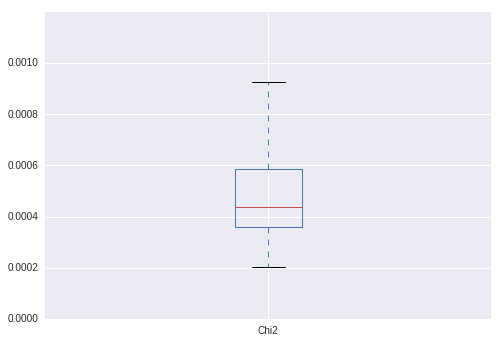

In [123]:
print sahara_summary2000['Chi2'].describe()
sahara_summary2000['Chi2'].plot(kind='box')
plt.ylim(0,0.0012)
plt.show()

count    2000.000000
mean        0.051116
std         0.152189
min         0.000535
25%         0.001330
50%         0.002125
75%         0.004868
max         2.021200
Name: Chi2, dtype: float64


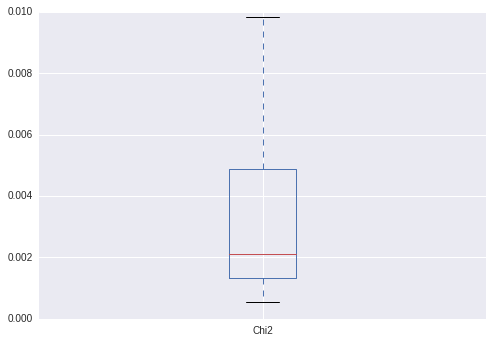

In [122]:
print amazon_summary2000['Chi2'].describe()
amazon_summary2000['Chi2'].plot(kind='box')
plt.ylim(0,0.01)
plt.show()

count    2000.000000
mean        0.195655
std         4.867184
min       -28.296242
25%        -0.409289
50%         0.177881
75%         0.412871
max       113.260650
Name: Retrieved albedo at 737nm, dtype: float64


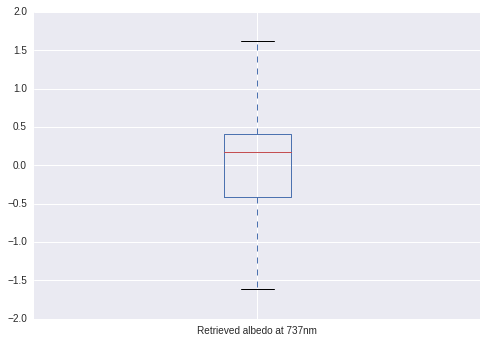

In [152]:
print sahara_summary2000['Retrieved albedo at 737nm'].describe()
sahara_summary2000['Retrieved albedo at 737nm'].plot(kind='box')
#plt.ylim(0,0.0012)
plt.ylim(-2,2)
plt.show()

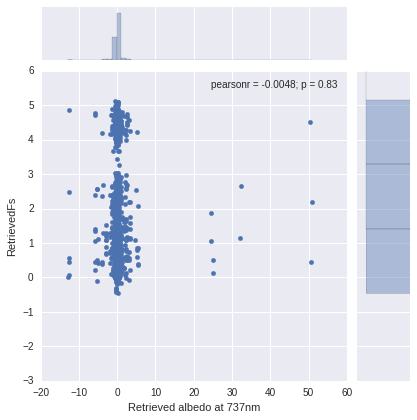

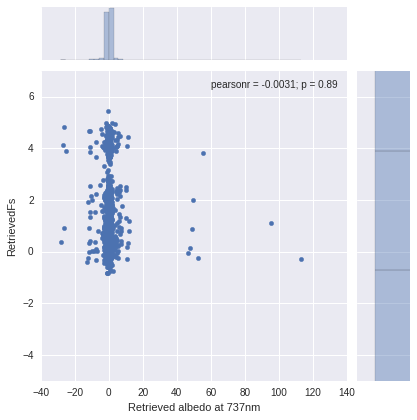

In [160]:
sns.jointplot(x='Retrieved albedo at 737nm',y='RetrievedFs',data=amazon_summary2000)
plt.xlim(-2,10)
plt.ylim(-3,6)
sns.jointplot(x='Retrieved albedo at 737nm',y='RetrievedFs',data=sahara_summary2000)
plt.xlim(-2,4)
plt.ylim(-5,7)
#plt.(amazon_summary2000['Chi2'],amazon_summary2000['RetrievedFs'],c=amazon_summary2000['Retrieved albedo at 737nm'],cmap='jet')
#plt.colorbar()
plt.show()

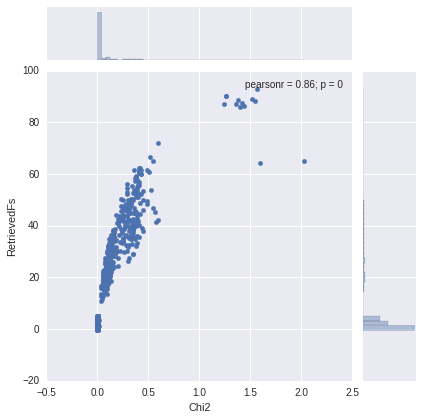

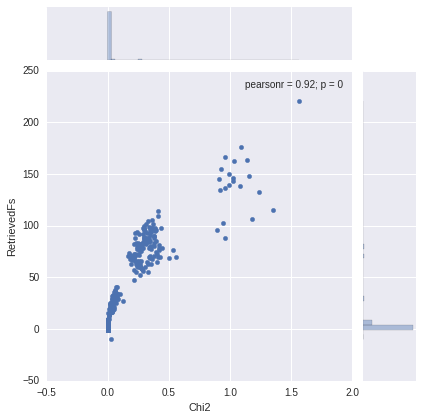

In [100]:
sns.jointplot(x='Chi2',y='RetrievedFs',data=amazon_summary2000)
#plt.xlim(0,0.1)
#plt.ylim(0,4)
sns.jointplot(x='Chi2',y='RetrievedFs',data=sahara_summary2000)
#plt.xlim(0,0.1)
#plt.ylim(0,4)
#plt.(amazon_summary2000['Chi2'],amazon_summary2000['RetrievedFs'],c=amazon_summary2000['Retrieved albedo at 737nm'],cmap='jet')
#plt.colorbar()

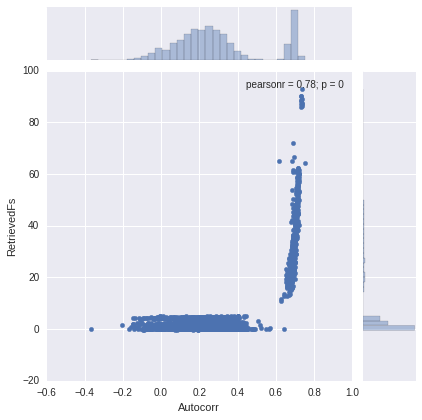

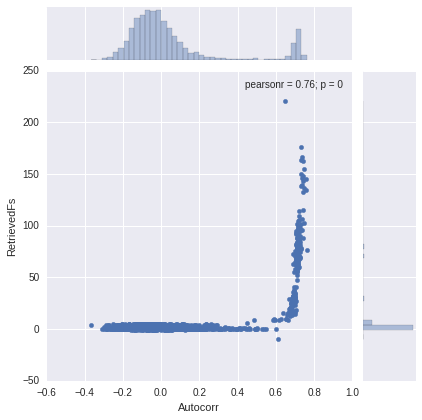

In [107]:
sns.jointplot(x='Autocorr',y='RetrievedFs',data=amazon_summary2000)
sns.jointplot(x='Autocorr',y='RetrievedFs',data=sahara_summary2000)

(-2, 7)

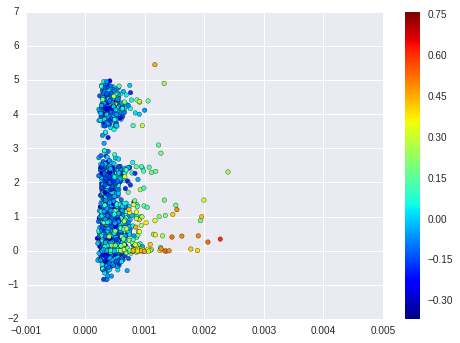

In [169]:
plt.scatter(sahara_summary2000['Chi2'],sahara_summary2000['RetrievedFs'],c=sahara_summary2000['Autocorr'],cmap='jet')
plt.colorbar()
plt.xlim(-0.001,0.005)
plt.ylim(-2,7)

In [42]:
fs_nega_am2000 = amazon_summary2000.loc[amazon_summary2000['RetrievedFs'] < 0,['RetrievedFs','Retrieved Refl at 737nm',
                                                                'DISAMAR Refl at 737nm','Chi2','Autocorr','SZA','VZA']]

fs_nega_sa2000 = sahara_summary2000.loc[sahara_summary2000['RetrievedFs'] < 0,['RetrievedFs','Retrieved Refl at 737nm',
                                                                'DISAMAR Refl at 737nm','Chi2','Autocorr','SZA','VZA']]

In [62]:
fs_nega_am2000.describe()

,RetrievedFs,Retrieved Refl at 737nm,DISAMAR Refl at 737nm,Chi2,Autocorr,SZA,VZA
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000
mean,-0.067818,9.287558e-02,0.173242,0.002172,0.200231,42.046667,24.973333
std,0.109311,8.396941e-17,0.004362,0.001377,0.136965,10.832976,18.094290
min,-0.462462,9.287558e-02,0.163889,0.000612,-0.094670,24.600000,1.200000
25%,-0.098018,9.287558e-02,0.170160,0.001249,0.117555,33.600000,9.200000
50%,-0.017728,9.287558e-02,0.173109,0.001826,0.236128,39.650000,18.000000
75%,-0.004297,9.287558e-02,0.176780,0.002731,0.290396,50.700000,43.925000
max,-0.000021,9.287558e-02,0.180489,0.006398,0.444798,62.400000,53.700000


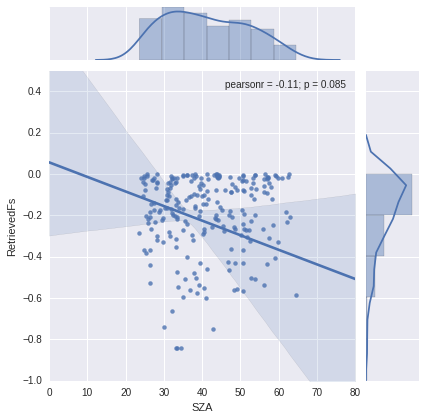

In [64]:
fs_nega_am2000.shape
sns.jointplot(x='SZA',y='RetrievedFs',data=fs_nega_sa2000,kind='reg')
sns.set(font_scale=1)
plt.ylim(-1,0.5)
plt.show()

(-1, 0.1)

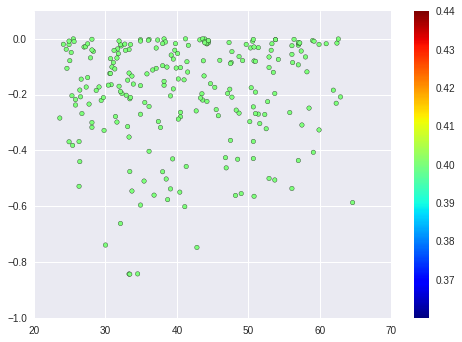

In [61]:
plt.scatter(fs_nega_sa2000['SZA'],fs_nega_sa2000['RetrievedFs'],c=fs_nega_sa2000['Retrieved Refl at 737nm'],cmap='jet')
plt.colorbar()
plt.ylim(-1,0.1)

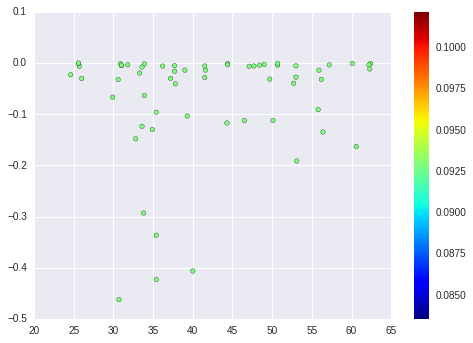

In [58]:
plt.scatter(fs_nega_am2000['SZA'],fs_nega_am2000['RetrievedFs'],c=fs_nega_am2000['Retrieved Refl at 737nm'],cmap='jet')
plt.colorbar()
#plt.xlim(-0.001,0.005)
#plt.ylim(-2,7)